In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%%file try_faust.dsp

import("stdfaust.lib");

average(x)	= (x + x') / 2.0;

process = vgroup("impulse", (button("play"): ba.impulsify))
		: vgroup("resonator", (+ ~ (de.delay(4096, 5) : average)));


Overwriting try_faust.dsp


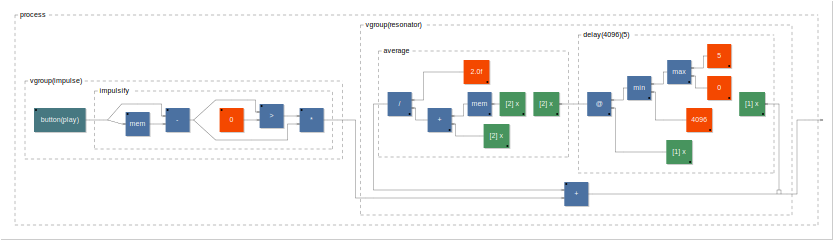

In [2]:
! faust -svg try_faust.dsp > /dev/null

# show try_faust-svg/process.svg


from IPython.display import SVG, display

display(SVG(filename="try_faust-svg/process.svg"))


(1, 50)


array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.25      , 0.5       , 0.25      ,
        0.        , 0.        , 0.        , 0.125     , 0.375     ,
        0.375     , 0.125     , 0.        , 0.        , 0.0625    ,
        0.25      , 0.375     , 0.25      , 0.0625    , 0.        ,
        0.03125   , 0.15625   , 0.3125    , 0.3125    , 0.15625   ,
        0.03125   , 0.015625  , 0.09375   , 0.234375  , 0.3125    ,
        0.234375  , 0.09375   , 0.0234375 , 0.0546875 , 0.1640625 ,
        0.2734375 , 0.2734375 , 0.1640625 , 0.05859375, 0.0390625 ]],
      dtype=float32)

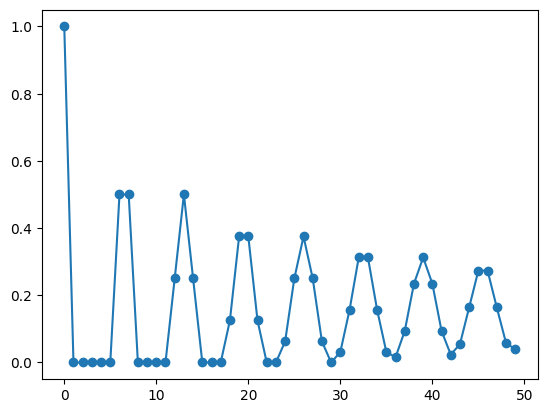

In [3]:
import FAUSTPy
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(threshold=np.inf)


fs = 44100
dsp = FAUSTPy.FAUST(
    "try_faust.dsp",
    fs,
)
dsp.dsp.metadata

audio = np.zeros((dsp.dsp.num_in, fs), dtype=dsp.dsp.dtype)

dsp.dsp.b_impulse.p_play.zone = 1
assert dsp.dsp.b_impulse.p_play.zone == 1.0


N_samples = 50
out = dsp.compute(N_samples)
plt.plot(out[0], "-o")


np.set_printoptions(threshold=np.inf)


out

In [4]:
import sympy as sp

z = sp.Symbol("z")
s = sp.series((0.5 * z**0) + (0.5 * z**1), n=100)
s = sp.series(1 / (1 - s * z**6), n=100)
s.expand()
assert abs((np.array([s.coeff(z, i) for i in range(50)]) - out)).sum() < 1e-6

print("they match!")
s

they match!


1 + 0.5*z**6 + 0.5*z**7 + 0.25*z**12 + 0.5*z**13 + 0.25*z**14 + 0.125*z**18 + 0.375*z**19 + 0.375*z**20 + 0.125*z**21 + 0.0625*z**24 + 0.25*z**25 + 0.375*z**26 + 0.25*z**27 + 0.0625*z**28 + 0.03125*z**30 + 0.15625*z**31 + 0.3125*z**32 + 0.3125*z**33 + 0.15625*z**34 + 0.03125*z**35 + 0.015625*z**36 + 0.09375*z**37 + 0.234375*z**38 + 0.3125*z**39 + 0.234375*z**40 + 0.09375*z**41 + 0.0234375*z**42 + 0.0546875*z**43 + 0.1640625*z**44 + 0.2734375*z**45 + 0.2734375*z**46 + 0.1640625*z**47 + 0.05859375*z**48 + 0.0390625*z**49 + 0.109375*z**50 + 0.21875*z**51 + 0.2734375*z**52 + 0.21875*z**53 + 0.111328125*z**54 + 0.048828125*z**55 + 0.07421875*z**56 + 0.1640625*z**57 + 0.24609375*z**58 + 0.24609375*z**59 + 0.1650390625*z**60 + 0.080078125*z**61 + 0.0615234375*z**62 + 0.119140625*z**63 + 0.205078125*z**64 + 0.24609375*z**65 + 0.20556640625*z**66 + 0.12255859375*z**67 + 0.07080078125*z**68 + 0.09033203125*z**69 + 0.162109375*z**70 + 0.2255859375*z**71 + 0.225830078125*z**72 + 0.1640625*z**73 + 